In [ ]:
%tensorflow_version 1.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional,BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import  to_categorical
%matplotlib inline

TensorFlow 1.x selected.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
def clean_text(text):
    
    text=re.sub(r"[^a-zA-Z]"," ",text)
    text=text.lower()
    #text=re.sub(r"[0-9]","",text)
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    text=re.sub(r"[-()\"#/@;:<>{}+=~|.?,]","",text)
    word_tokens = word_tokenize(text)
    filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if w not in stopwords]
    text=" ".join(filtered_sentence)
    return text

In [ ]:
url='https://raw.githubusercontent.com/Prrriyanka/automatedessaygrading/master/actual%20dataset.csv'

testurl = "https://raw.githubusercontent.com/Nehaaamishra/dv/master/Untitled%20spreadsheet%20-%20Sheet1.csv"

train = pd.read_csv(url)

test = pd.read_csv(testurl)

test.head()




,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1,0,3,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,3,1,0,3,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,4,1,0,3,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,5,1,0,3,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,6,1,0,3,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


In [ ]:
train.head()

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1.0,0,3,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,3,1.0,0,3,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,4,1.0,0,3,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,5,1.0,0,3,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,6,1.0,0,3,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


In [ ]:
train['avg_score']=np.round((train.score_1+train.score_2+train.score_3)/3)

In [ ]:
train2=train.drop(columns=['ID','Essayset','min_score','max_score','clarity','coherent'])

In [ ]:
train.drop(columns=['score_1','score_2','score_3','score_4','score_5'],inplace=True)

In [ ]:
train.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,avg_score
0,1,1.0,0,3,average,worst,additional information would need replicate ex...,1.0
1,3,1.0,0,3,worst,above_average,need trial control set exact amount vinegar po...,1.0
2,4,1.0,0,3,worst,worst,student list rock better rock worse procedure,0.0
3,5,1.0,0,3,above_average,worst,student able make replicate would need tell us...,2.0
4,6,1.0,0,3,worst,worst,would need information would let different sam...,0.0


In [ ]:
train2.head()

,score_1,score_2,score_3,score_4,score_5,EssayText,avg_score
0,1,1,1.0,1.0,1.0,additional information would need replicate ex...,1.0
1,1,1,1.0,1.0,1.5,need trial control set exact amount vinegar po...,1.0
2,0,0,0.0,0.0,1.0,student list rock better rock worse procedure,0.0
3,2,2,2.0,2.5,1.0,student able make replicate would need tell us...,2.0
4,1,0,0.0,0.0,0.0,would need information would let different sam...,0.0


In [ ]:
max_words = 2500
max_len = 50
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train2.EssayText)
sequences = tok.texts_to_sequences(train2.EssayText)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix)
Y1=train2.avg_score

[[   0    0    0 ...   26  415   52]
 [   0    0    0 ...  439  785  316]
 [   0    0    0 ...  734 1756  121]
 ...
 [   0    0    0 ...  267  181  130]
 [   0    0    0 ...  267   65   58]
 [   0    0    0 ...  399   43   82]]


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,to_categorical(Y1),test_size=0.20)


In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(64))(layer)
    #layer = Bidirectional(LSTM(128))(layer)
    layer = Dense(64,name='FC1')(layer)
    #layer=BatchNormalization()(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(64,name='FC2')(layer)
    #layer=BatchNormalization()(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model
    

In [ ]:
model = RNN()
print(model.summary())
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=64,epochs=2,validation_data=(X_test,Y_test))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 50)            125000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               58880     
_________________________________________________________________
FC1 (Dense)                  (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
____________________________________________

In [ ]:
y_pred_train=model.predict(sequences_matrix)

In [ ]:
tt1=pd.DataFrame(y_pred_train,columns=['out1','out2','out3','out4'])

In [ ]:
train3=train.drop(columns=['ID','min_score','max_score','EssayText'])

In [ ]:
train4=pd.concat([train3,tt1],axis=1)

In [ ]:
train4.head()

,Essayset,clarity,coherent,avg_score,out1,out2,out3,out4
0,1.0,average,worst,1.0,0.077252,0.182335,0.437558,0.302855
1,1.0,worst,above_average,1.0,0.728914,0.250911,0.018163,0.002012
2,1.0,worst,worst,0.0,0.918654,0.078819,0.002307,0.000219
3,1.0,above_average,worst,2.0,0.198783,0.408076,0.339139,0.054001
4,1.0,worst,worst,0.0,0.841969,0.146382,0.010165,0.001484


In [ ]:
!pip install category_encoders
import category_encoders as ce


     |████████████████████████████████| 81kB 2.1MB/s 


In [ ]:
ce1=ce.TargetEncoder(cols = ['Essayset','clarity','coherent'], min_samples_leaf = 20)

In [ ]:
train4.loc[:,['Essayset','clarity','coherent']]=ce1.fit_transform(train4.loc[:,['Essayset','clarity','coherent']],train4.loc[:,['avg_score']])

In [ ]:
train4.head()

,Essayset,clarity,coherent,avg_score,out1,out2,out3,out4
0,1.480649,0.496662,0.482423,1.0,0.077252,0.182335,0.437558,0.302855
1,1.480649,0.486640,1.944411,1.0,0.728914,0.250911,0.018163,0.002012
2,1.480649,0.486640,0.482423,0.0,0.918654,0.078819,0.002307,0.000219
3,1.480649,1.943451,0.482423,2.0,0.198783,0.408076,0.339139,0.054001
4,1.480649,0.486640,0.482423,0.0,0.841969,0.146382,0.010165,0.001484


In [ ]:
X1=train4.drop(columns=['avg_score'])
Y1=train4.avg_score

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.01,
                 max_depth=4,
              
                 min_child_weight=0.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=123)

In [ ]:
xgb.fit(X1_train,Y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=0.5, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.6, verbosity=1)

In [ ]:
yy_test=xgb.predict(X1_test)

In [ ]:
from sklearn.metrics import  accuracy_score,classification_report

In [ ]:
accuracy_score(Y1_test,yy_test)

0.7863987635239568

In [ ]:
print(classification_report(Y1_test,yy_test))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1309
         1.0       0.73      0.71      0.72      1053
         2.0       0.81      0.80      0.81       749
         3.0       0.53      0.51      0.52       124

    accuracy                           0.79      3235
   macro avg       0.73      0.72      0.72      3235
weighted avg       0.78      0.79      0.79      3235



In [ ]:
test=pd.read_csv(testurl)

In [ ]:
test2=test.drop(columns=['ID','min_score','max_score'])

In [ ]:
test2.head()

,Essayset,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,1,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,1,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,1,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,1,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


In [ ]:
test2['EssayText']=test2['EssayText'].apply(clean_text)

In [ ]:
sequences_test = tok.texts_to_sequences(test2.EssayText)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)


In [ ]:
test2_test=model.predict(sequences_matrix_test)

In [ ]:
testdf=pd.DataFrame(test2_test,columns=['out1','out2','out3','out4'])

In [ ]:
test3=pd.concat([test2,testdf],axis=1)

In [ ]:
test3.drop(columns=['EssayText'],inplace=True)
test3.head()

,Essayset,score_1,score_2,score_3,score_4,score_5,clarity,coherent,out1,out2,out3,out4
0,1,1,1,1.0,1.0,1.0,average,worst,0.077252,0.182335,0.437558,0.302855
1,1,1,1,1.0,1.0,1.5,worst,above_average,0.728914,0.250911,0.018163,0.002012
2,1,0,0,0.0,0.0,1.0,worst,worst,0.918654,0.078819,0.002307,0.000219
3,1,2,2,2.0,2.5,1.0,above_average,worst,0.198783,0.408076,0.339139,0.054001
4,1,1,0,0.0,0.0,0.0,worst,worst,0.841969,0.146382,0.010165,0.001484


In [ ]:

test.head()


,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1,0,3,1,1,1.0,1.0,1.0,average,worst,additional information would need replicate ex...
1,3,1,0,3,1,1,1.0,1.0,1.5,worst,above_average,need trial control set exact amount vinegar po...
2,4,1,0,3,0,0,0.0,0.0,1.0,worst,worst,student list rock better rock worse procedure
3,5,1,0,3,2,2,2.0,2.5,1.0,above_average,worst,student able make replicate would need tell us...
4,6,1,0,3,1,0,0.0,0.0,0.0,worst,worst,would need information would let different sam...


In [ ]:
test3.loc[:,['Essayset','clarity','coherent']]=ce1.transform(test3.loc[:,['Essayset','clarity','coherent']])

In [ ]:
test3.drop(columns=['score_1','score_2','score_3','score_4','score_5'],inplace=True)

test3.head()


,Essayset,clarity,coherent,out1,out2,out3,out4
0,1.480649,0.496662,0.482423,0.077252,0.182335,0.437558,0.302855
1,1.480649,0.486640,1.944411,0.728914,0.250911,0.018163,0.002012
2,1.480649,0.486640,0.482423,0.918654,0.078819,0.002307,0.000219
3,1.480649,1.943451,0.482423,0.198783,0.408076,0.339139,0.054001
4,1.480649,0.486640,0.482423,0.841969,0.146382,0.010165,0.001484


In [ ]:
final_out=xgb.predict(test3)

In [ ]:
out=pd.DataFrame()


In [ ]:
out['id']=test.ID
out['essay_set']=test.Essayset


In [ ]:
out['essay_score']=final_out
out.tail()

,id,essay_set,essay_score
4,6,1,0.0
5,7,1,0.0
6,8,1,3.0
7,9,1,3.0
8,10,1,2.0


In [ ]:
out.to_csv('SCORES.csv',index=None)
nn=pd.read_csv('SCORES.csv')

In [ ]:
nn.head(10)

,id,essay_set,essay_score
0,1,1,1.0
1,3,1,1.0
2,4,1,0.0
3,5,1,1.0
4,6,1,0.0
5,7,1,0.0
6,8,1,3.0
7,9,1,3.0
8,10,1,2.0


In [ ]:
#absolute_path = os.path.abspath(os.path.dirname('output.csv'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

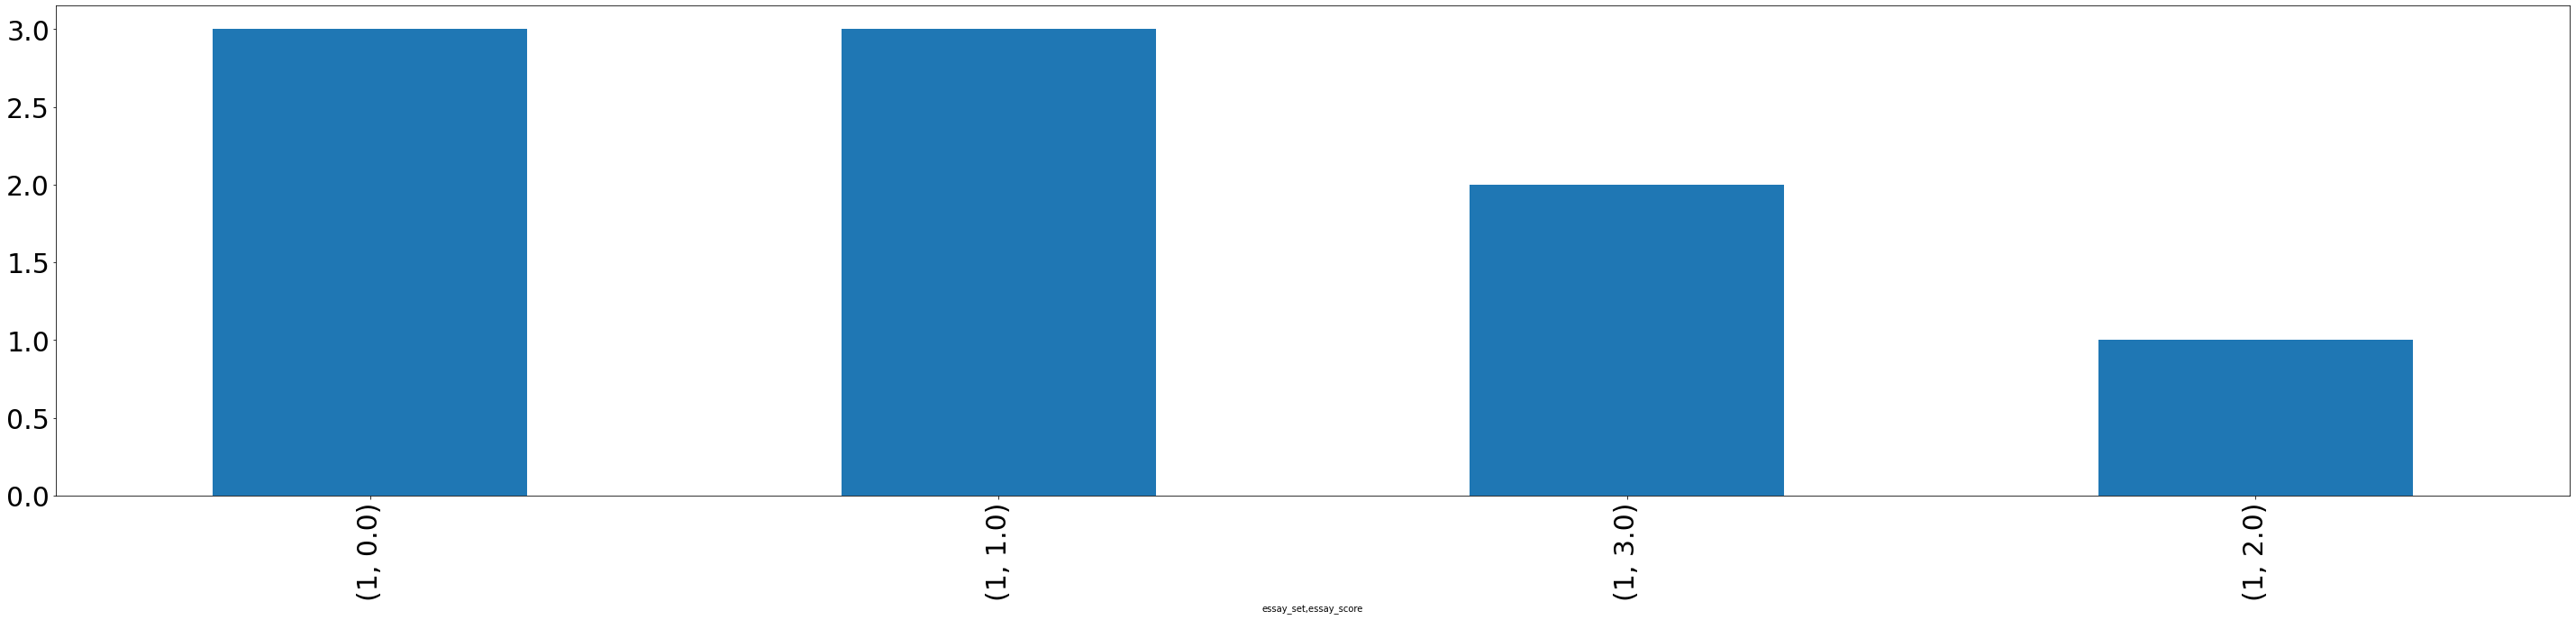

In [ ]:
out.groupby('essay_set').essay_score.value_counts().plot(kind='bar',figsize=(50,10),fontsize=30)
from google.colab import files
files.download("SCORES.csv")